<a href="https://colab.research.google.com/github/priiyaanjaalii0611/CarRegistrationPlateRecognition/blob/main/ReadLicensePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALLING DEPENDENCIES**

In [2]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 61 kB/s 
     |████████████████████████████████| 47.7 MB 1.7 MB/s 


## **IMPORTING DEPENDENCIES**

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


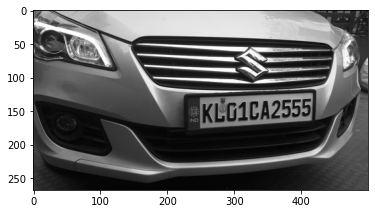

In [34]:
img=cv2.imread('Cars0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))  #cause matplotlib expects rgb

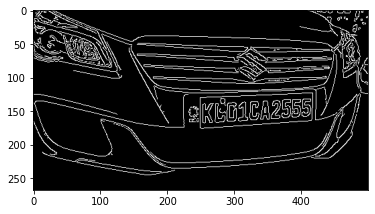

In [35]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

**FIND COUNTORS**

In [36]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #returns contours in simplified approx formin a tree structure
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [37]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #approx roughness that is dents will ignore that is numbers
    if len(approx) == 4:
        location = approx
        break

In [13]:
location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [38]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

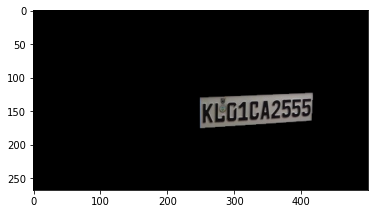

In [15]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [39]:
(x,y) = np.where(mask==255)   #restoring area where image is not black
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

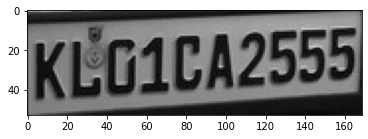

In [28]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


# **EASY OCR**

In [40]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.4923475831648186)]

# **RENDERING RESULT**

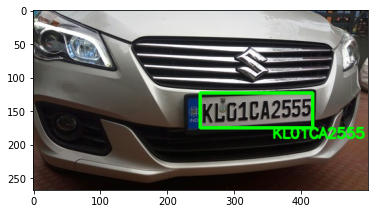

In [41]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0]-60, approx[1][0][1]+60), fontFace=font, fontScale=0.7, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))